In [2]:
import torch
from d2l import torch as d2l
from torch import nn

#### Implementation from scratch

In [9]:
class StackedRNNScratch(d2l.Module):
    def __init__(self, num_inputs, num_hiddens, num_layers, sigma = 0.01):
        super().__init__()
        self.save_hyperparameters()
        self.rnns = nn.Sequential(
            *[d2l.RNNScratch(num_inputs if i == 0 else num_hiddens, num_hiddens, sigma) for i in range(num_layers)]
        )
    
    def forward(self, inputs, Hs = None):
        outputs = inputs
        if Hs is None: Hs = [None] * self.num_layers
        for i in range(self.num_layers):
            outputs, Hs[i] = self.rnns[i](outputs, Hs[i])
            # Shape of outputs: List(num_steps, batch_size, num_hiddens)
            outputs = torch.stack(outputs, 0)
        return outputs, Hs

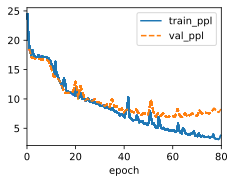

In [ ]:
data = d2l.TimeMachine(batch_size = 1024, num_steps=64)
rnn_block = StackedRNNScratch(num_inputs=len(data.vocab), num_hiddens=128, num_layers=2W)
model = d2l.RNNLMScratch(rnn_block, len(data.vocab), lr = 2)
trainer = d2l.Trainer(max_epochs=80, num_gpus=1, gradient_clip_val=1)
trainer.fit(model, data)

In [6]:
model.predict(prefix = "time ", num_preds=32, vocab = data.vocab, device = d2l.try_gpu())

'time the pall and the pall and the pa'

#### Concise implementation for RNN blocks

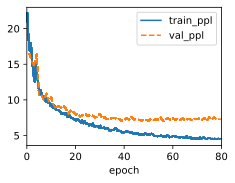

In [11]:
rnn_block = torch.nn.RNN(len(data.vocab), 32, 2)
model = d2l.RNNLM(rnn_block, len(data.vocab), lr = 2)
trainer.fit(model, data)

In [12]:
model.predict(prefix = "time ", num_preds=32, vocab = data.vocab, device = d2l.try_gpu())

'time are all the time the time the ti'

#### Concise implementation for LSTM blocks

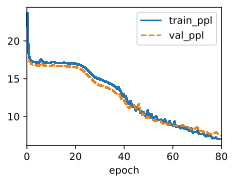

In [19]:
lstm_block = torch.nn.LSTM(len(data.vocab), hidden_size =64, num_layers=2)
model = d2l.RNNLM(lstm_block, len(data.vocab), lr = 2)
trainer.fit(model, data)

In [20]:
model.predict(prefix = "time ", num_preds=32, vocab = data.vocab, device = d2l.try_gpu())

'time the the the the the the the the '